#Xây dựng cây quyết định và rừng cây trên dữ liệu Titanic


Dữ liệu lấy từ: https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset

##A: Xây dựng cây quyết định bằng thư viện sklearn


###1. Import các thư viện cần thiết



In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn import tree
import graphviz

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

###2. Load dữ liệu

In [2]:
df = pd.read_csv('/content/titanic_train.csv')
display(df.head())

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

###3. Tiền xử lý dữ liệu
Xử lý các giá trị thiếu


In [3]:
display(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)
display(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Mã hóa các biến phân loại



In [5]:
categorical_cols = ['Sex', 'Embarked']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df.head())

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500      True       False        True  
1          PC 17599  71.2833     False       False       False  
2  STON/O2. 3101282   7.9250     False       False        True  
3            113803  53.1000     False       False        True  
4            373450   8.0500      True       False        True

Chia dữ liệu thành tập huấn luyện và tập kiểm tra.



In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.head())
display(y_train.head())

Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
331       1  45.5      0      0  28.5000      True       False        True
733       2  23.0      0      0  13.0000      True       False        True
382       3  32.0      0      0   7.9250      True       False        True
704       3  26.0      1      0   7.8542      True       False        True
813       3   6.0      4      2  31.2750     False       False        True

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

### 4. Xây dựng cây quyết định
Khởi tạo và huấn luyện mô hình cây quyết định, sau đó đánh giá hiệu suất của cây quyết định.


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

Decision Tree Accuracy: 0.7821229050279329


In [8]:
dot_data = tree.export_graphviz(decision_tree_model, out_file=None,
                                filled=True,
                                rounded=True,
                                feature_names=X_train.columns,
                                proportion=True,
                                class_names=['Not defaulted', 'Defaulted'])
graph = graphviz.Source(dot_data)
graph

###5. Tạo cây quyết định và xác định các giá trị tham số có thể chọn để tìm tham số tối ưu

In [9]:
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]} #parameters
dt = tree.DecisionTreeClassifier() #tree modal
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
n_jobs=None, refit=True, cv=4, verbose=1,
error_score=np.nan,
return_train_score=True) # cv is the best model.
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='roc_auc', verbose=1)

###6. Vẽ biểu đồ đánh giá mô hình với các tham số chiều sâu của cây khác nhau

In [10]:
cv_results_df = pd.DataFrame(cv.cv_results_)
#View the names of the remaining columns in the results DataFrame
cv_results_df.columns
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score']/np.sqrt(4),
             label='Mean $\pm$ 1 SE training scores')
ax.errorbar(cv_results_df['param_max_depth'],
           cv_results_df['mean_test_score'],
             yerr=cv_results_df['std_test_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

Text(0, 0.5, 'ROC AUC')

##B. Xây dựng rừng cây

###1. Tạo rừng cây với lớp RandomForestClassifier trong Scikit-Learn

In [11]:
rf = RandomForestClassifier\
(n_estimators=10, criterion='gini', max_depth=3,
 min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
 max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
 bootstrap=True, oob_score=False, n_jobs=None,
 random_state=4, verbose=0, warm_start=False, class_weight=None)

###2. Tìm tham số tối ưu cho mô hình rừng cây và thực hiện train với tham số tối ưu đó

In [12]:
#a parameter grid for this exercise in order to search the numbers of
#trees, ranging from 10 to 100 by 10s

rf_params_ex = {'n_estimators': list(range(10, 110, 10))}
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex,
                        scoring='roc_auc', n_jobs=None,
                        refit=True, cv=4, verbose=1,
                        error_score=np.nan,
                        return_train_score=True)

cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

###3. Vẽ biểu đồ đánh giá mô hình rừng cây với các tham số số cây có trong rừng khác nhau

In [13]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
             cv_rf_ex_results_df['mean_fit_time'],
             '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')

axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4))
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC +/- 1 SE ')

plt.tight_layout()

###4. Xem tham số tốt nhất của rừng cây, xem mức độ quan trọng của từng feature trong mô hình với tham số tốt nhất

<Axes: >

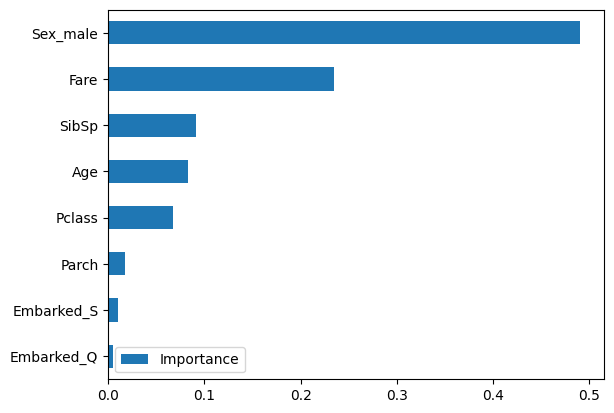

In [14]:
# {'n_estimators': 50}
cv_rf_ex.best_params_
# the feature names and importances
feat_imp_df = pd.DataFrame({
    'Importance': cv_rf_ex.best_estimator_.feature_importances_
}, index=X_train.columns)
feat_imp_df.sort_values('Importance', ascending=True).plot.barh()